In [31]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [32]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Printing the data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [33]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


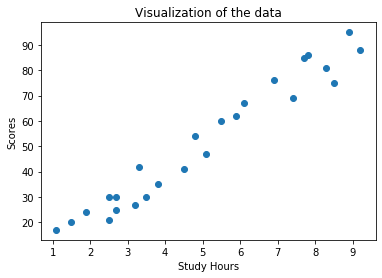

In [57]:
plt.scatter(x =df.Hours, y = df.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.title("Visualization of the data")
plt.show()

In [35]:
#ML Libraries
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split


In [36]:
#Data preparation
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
reg = lr()
reg.fit(x_train, y_train)
  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

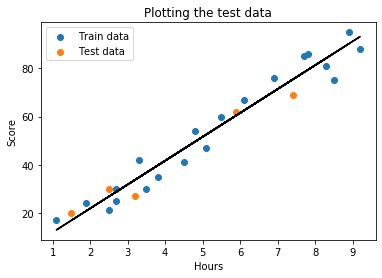

In [60]:
line = reg.intercept_ + reg.coef_*x


plt.scatter(x_train, y_train, label = 'Train data')
plt.scatter(x_test, y_test, label = 'Test data')
plt.legend()
plt.title("Plotting the test data")
plt.plot(x, line, color = 'black')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [39]:
y_pred  = reg.predict(x_test)


In [44]:
#Comparing the original data and predicted data
value=pd.DataFrame(np.c_[ y_test, y_pred], columns = ["Original_marks","predicted_marks"])
value

,Original_marks,predicted_marks
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


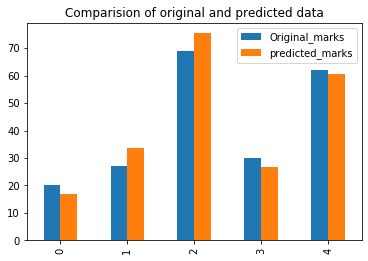

In [61]:
value.plot.bar()
plt.title("Comparision of original and predicted data")
plt.show()

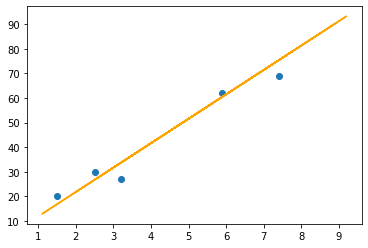

In [63]:
plt.scatter(x_test, y_test)
plt.plot(x_train, reg.predict(x_train), color = "orange")


In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean square error :",mean_squared_error(y_test,y_pred))


Mean square error : 21.5987693072174


In [49]:
r2_score(y_test, y_pred)

0.9454906892105356

In [50]:
reg.intercept_

2.018160041434683

In [51]:
reg.coef_

array([9.91065648])

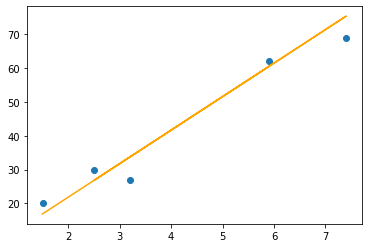

Accuracy of this prediction in percentage:  94.549


In [55]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='orange')
plt.show()
accuracy=reg.score(x_test,y_test)
print('Accuracy of this prediction in percentage: ',round(accuracy*100,3),)                    